# These are all tentative pa pooooo tapusin ko bukasss hihiiii

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:

# Read the CSV file
file_path = 'data/df_cleaned.csv'
df_cleaned = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_cleaned

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,currency,price,usdprice,month,month_sin,month_cos,distance_from_central,climate_season,pandemic_phase,major_holiday_flag
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,...,PHP,15.00,0.3717,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,...,PHP,18.35,0.4548,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,PHP,18.00,0.4461,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,PHP,16.35,0.4052,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,...,PHP,105.37,2.6114,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123089,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,...,PHP,71.67,1.4949,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,...,PHP,103.33,2.1555,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,...,PHP,114.17,2.3814,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,...,PHP,45.00,0.9387,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0


In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123094 entries, 0 to 123093
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   123094 non-null  object 
 1   admin1                 123094 non-null  object 
 2   admin2                 123094 non-null  object 
 3   market                 123094 non-null  object 
 4   latitude               123094 non-null  float64
 5   longitude              123094 non-null  float64
 6   category               123094 non-null  object 
 7   commodity              123094 non-null  object 
 8   unit                   123094 non-null  object 
 9   priceflag              123094 non-null  object 
 10  pricetype              123094 non-null  object 
 11  currency               123094 non-null  object 
 12  price                  123094 non-null  float64
 13  usdprice               123094 non-null  float64
 14  month                  123094 non-nu

In [5]:
# for column in df_cleaned.columns:
#     unique_values = df_cleaned[column].unique()
#     print(f"Unique values in column '{column}':")
#     print(unique_values)
#     print("\n")

# Exploratory Data Analysis

In [6]:
# Summary Statistics
summary_stats = df_cleaned.describe().round(2)
summary_stats

,latitude,longitude,price,usdprice,month,month_sin,month_cos,distance_from_central,major_holiday_flag
count,123094.00,123094.00,123094.00,123094.00,123094.00,123094.00,123094.00,123094.00,123094.00
mean,11.72,122.87,117.43,2.24,6.74,-0.06,-0.01,497.33,0.17
std,3.62,1.92,112.09,2.10,3.42,0.69,0.72,320.42,0.38
min,5.03,118.74,3.48,0.07,1.00,-1.00,-1.00,0.56,0.00
25%,8.48,121.09,40.98,0.80,4.00,-0.87,-0.87,210.65,0.00
50%,11.58,122.59,81.15,1.57,7.00,-0.00,-0.00,466.57,0.00
75%,14.67,124.65,158.33,3.04,10.00,0.50,0.87,791.17,0.00
max,18.19,126.21,1216.67,21.06,12.00,1.00,1.00,1072.39,1.00


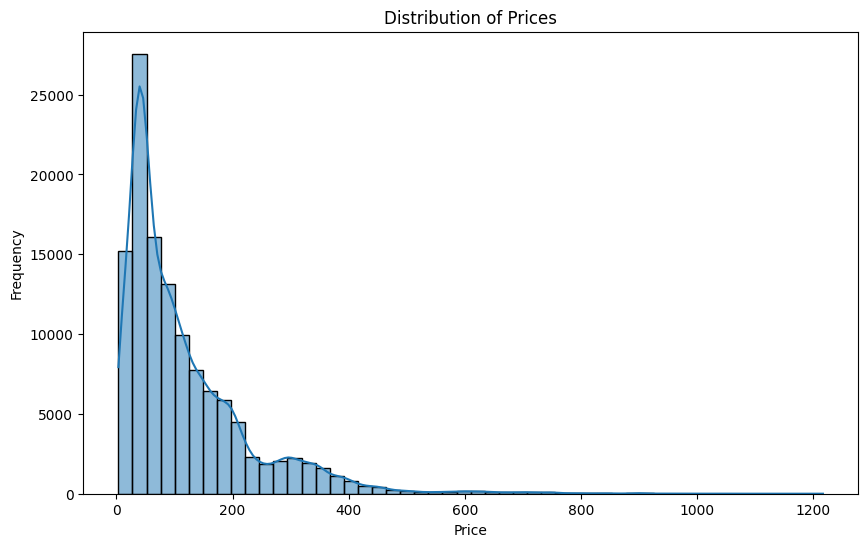

In [7]:
import seaborn as sns

# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

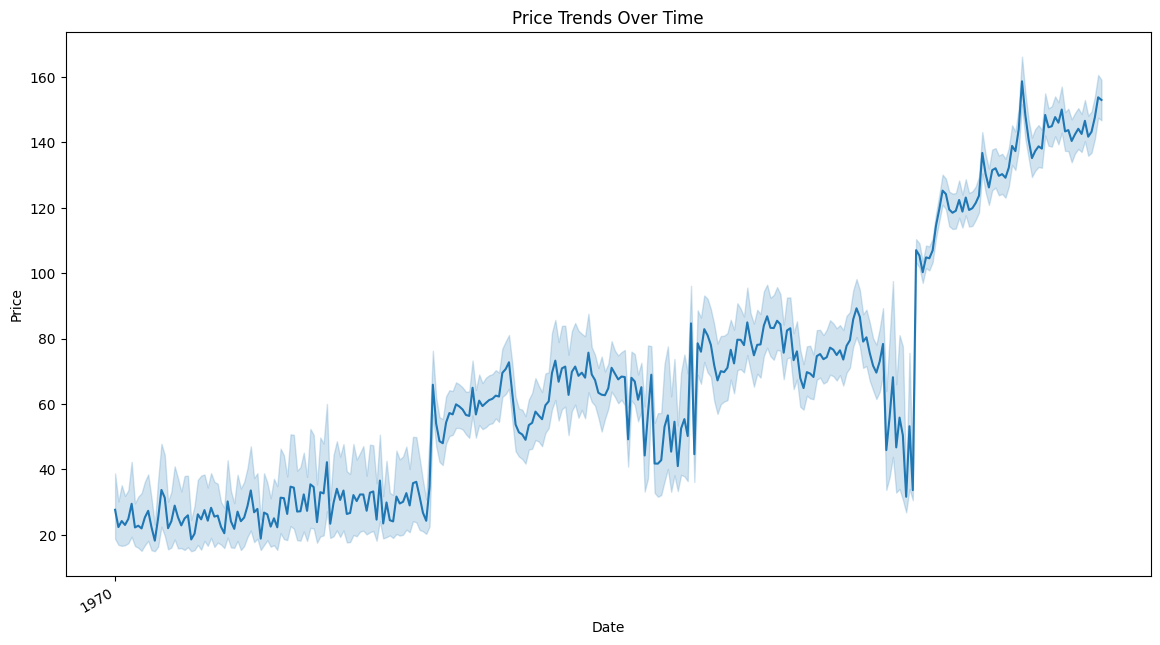

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Price Trends Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_cleaned, x='date', y='price')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set date format on x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format date as Year

# Automatically format x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

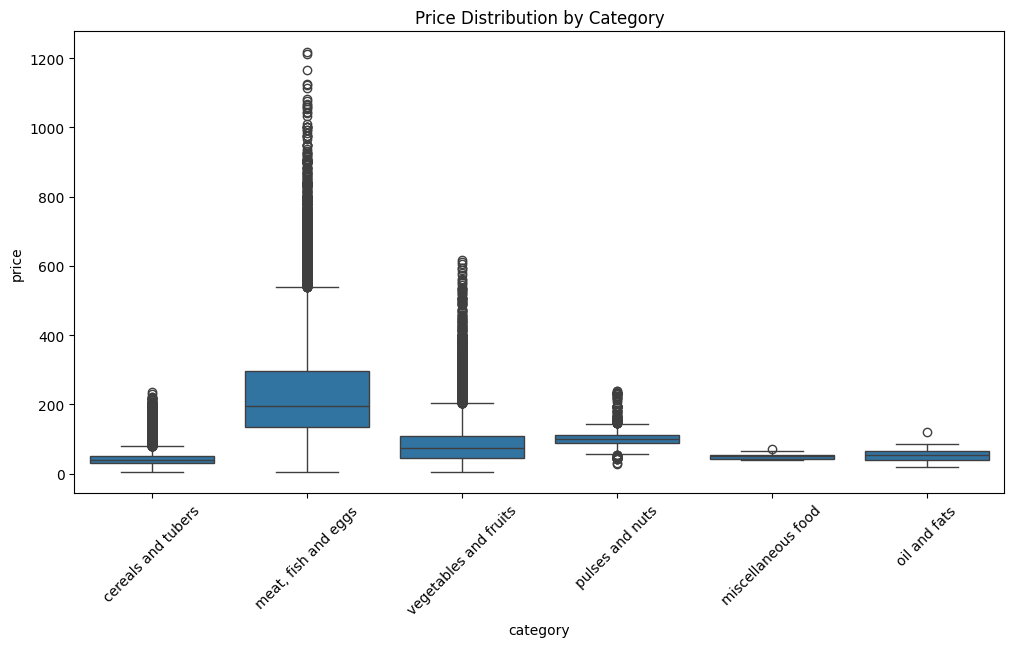

In [9]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df_cleaned, x='category', y='price') 
plt.title('Price Distribution by Category') 
plt.xticks(rotation=45) 
plt.show()

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Swarm Plot of Prices by Category
# plt.figure(figsize=(12, 6))
# sns.swarmplot(data=df_cleaned, x='category', y='price')
# plt.title('Price Distribution by Category')
# plt.xlabel('Category')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.show()

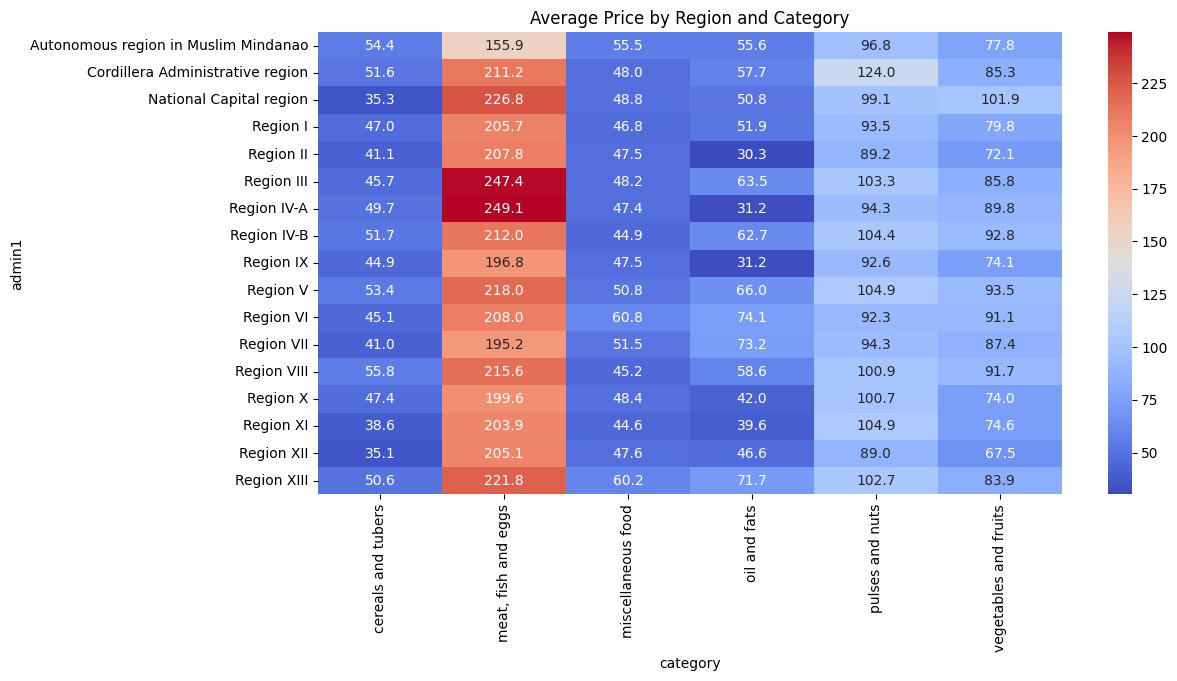

In [11]:
# Heatmap of Prices by Region
plt.figure(figsize=(12, 6))
df_pivot = df_cleaned.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Price by Region and Category')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Assuming df_cleaned is already defined and loaded
# Convert the date column to datetime format if it's not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract the year from the date column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Create a dropdown widget for selecting a year, including an "All" option
year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df_cleaned['year'].unique().tolist()),
    description='Year:',
    disabled=False,
)

# Function to update the heatmap based on the selected year
def update_heatmap(year):
    if year == 'All':
        df_filtered = df_cleaned
    else:
        df_filtered = df_cleaned[df_cleaned['year'] == year]
    
    # Pivot table for the heatmap
    df_pivot = df_filtered.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
    
    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
    plt.title(f'Average Price by Region and Category for Year: {year}')
    plt.show()

# Display the dropdown and set up the interaction
widgets.interact(update_heatmap, year=year_dropdown)

interactive(children=(Dropdown(description='Year:', options=('All', 2000, 2001, 2002, 2003, 2004, 2005, 2006, …

<function __main__.update_heatmap(year)>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Assuming df_cleaned is already defined and loaded
# Convert the date column to datetime format if it's not already
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract the year from the date column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Create a dropdown widget for selecting a year, including an "All" option
year_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df_cleaned['year'].unique().tolist()),
    description='Year:',
    disabled=False,
)

# Function to update the heatmap based on the selected year
def update_heatmap(year):
    if year == 'All':
        df_filtered = df_cleaned
    else:
        df_filtered = df_cleaned[df_cleaned['year'] == year]
    
    # Pivot table for the heatmap
    df_pivot = df_filtered.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
    
    # Plot the heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
    plt.title(f'Average Price by Region and Category for Year: {year}')
    plt.tight_layout()  # Adjust the layout to fit the figure area
    plt.show()

# Display the dropdown and set up the interaction
widgets.interact(update_heatmap, year=year_dropdown)

interactive(children=(Dropdown(description='Year:', options=('All', 2000, 2001, 2002, 2003, 2004, 2005, 2006, …

<function __main__.update_heatmap(year)>

In [14]:
# Group by category and get the unique commodities in each category
categories = df_cleaned.groupby('category')['commodity'].unique()

# Print the commodities included in each category
for category, commodities in categories.items():
    print(f"Category: {category}")
    print("Commodities:")
    for commodity in commodities:
        print(f" - {commodity}")
    print("\n")

Category: cereals and tubers
Commodities:
 - Maize flour (yellow)
 - Rice (milled, superior)
 - Rice (regular, milled)
 - Maize flour (white)
 - Maize (white)
 - Maize (yellow)
 - Potatoes (Irish)
 - Rice (paddy)
 - Sweet potatoes
 - Rice (premium)
 - Rice (well milled)
 - Rice (special)
 - Semolina (white)
 - Semolina (yellow)
 - Taro


Category: meat, fish and eggs
Commodities:
 - Meat (pork)
 - Eggs
 - Fish (fresh)
 - Meat (beef, chops with bones)
 - Meat (chicken, whole)
 - Anchovies
 - Fish (roundscad)
 - Fish (slipmouth)
 - Fish (threadfin bream)
 - Shrimp (endeavor)
 - Eggs (duck)
 - Fish (frigate tuna)
 - Fish (redbelly yellowtail fusilier)
 - Meat (beef)
 - Meat (pork, hock)
 - Crab
 - Fish (milkfish)
 - Fish (tilapia)
 - Shrimp (tiger)
 - Meat (pork, with bones)
 - Fish (mackerel, fresh)
 - Chicken
 - Meat (pork, with fat)


Category: miscellaneous food
Commodities:
 - Sugar (white)
 - Sugar (brown)


Category: oil and fats
Commodities:
 - Oil (cooking)


Category: pulses and

In [15]:
# # Geospatial Visualization of Markets
# m = folium.Map(location=[12.8797, 121.7740], zoom_start=6)
# for _, row in df_cleaned.iterrows():
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=3,
#         popup=f"{row['market']}: {row['price']} PHP",
#         color='blue',
#         fill=True,
#         fill_color='blue'
#     ).add_to(m)
# m.save("markets_map.html")

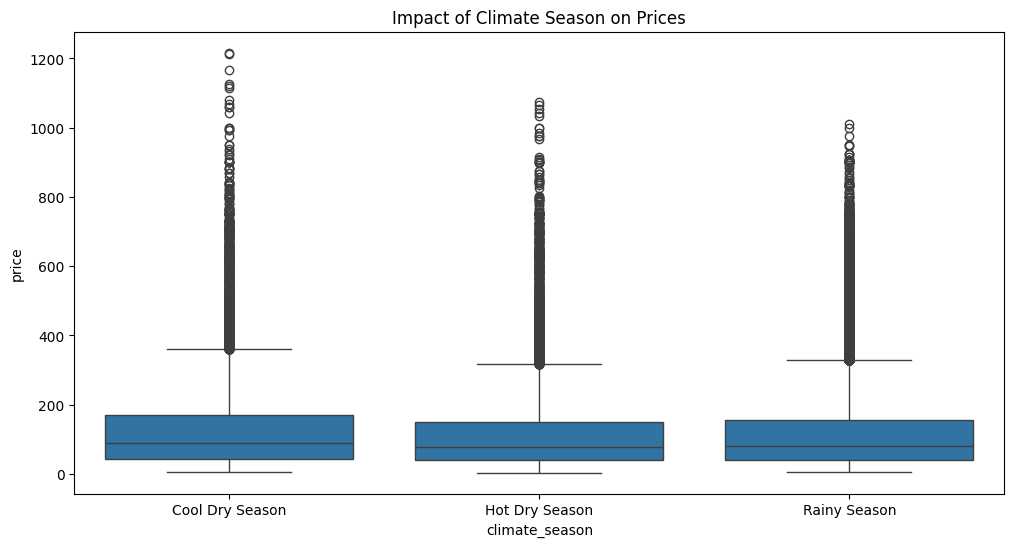

In [16]:
# Impact of Climate Season on Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='climate_season', y='price')
plt.title('Impact of Climate Season on Prices')
plt.show()

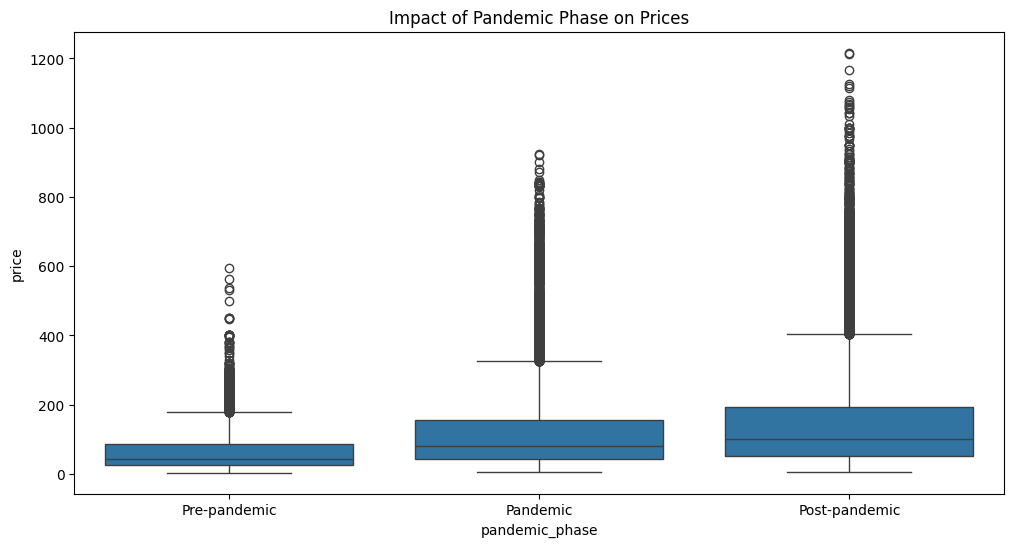

In [17]:
# Impact of Pandemic Phase on Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='pandemic_phase', y='price')
plt.title('Impact of Pandemic Phase on Prices')
plt.show()

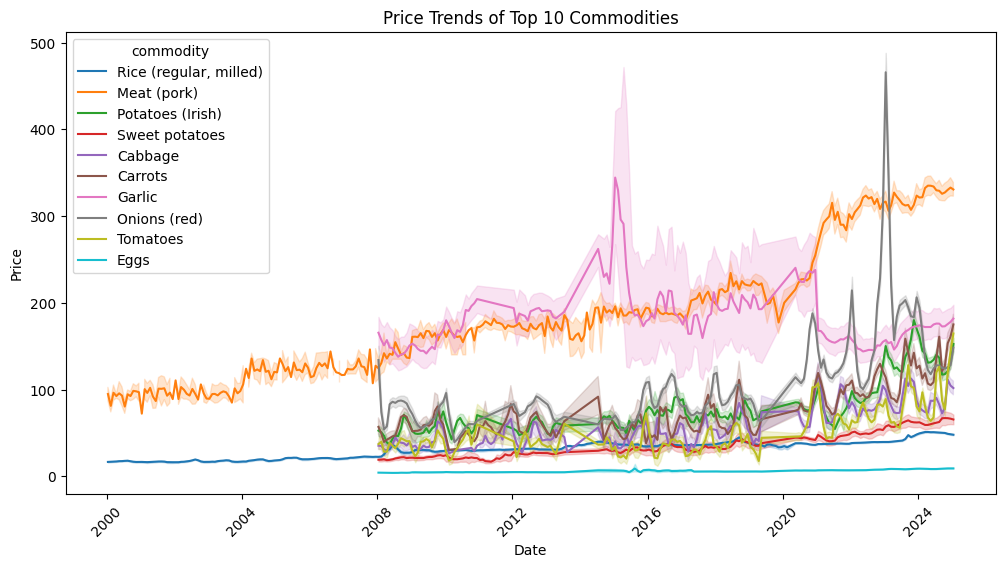

In [18]:
# Price Trends by Commodity
plt.figure(figsize=(12, 6))
top_commodities = df_cleaned['commodity'].value_counts().index[:10]
df_top = df_cleaned[df_cleaned['commodity'].isin(top_commodities)]
sns.lineplot(data=df_top, x='date', y='price', hue='commodity')
plt.title('Price Trends of Top 10 Commodities')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [19]:
df_cleaned1 = df_cleaned.copy()

In [20]:
# Separate the dataframe based on pricetype
df_wholesale = df_cleaned1[df_cleaned1['pricetype'] == 'Wholesale']
df_retail = df_cleaned1[df_cleaned1['pricetype'] == 'Retail']
df_farm_gate = df_cleaned1[df_cleaned1['pricetype'] == 'Farm Gate']

In [21]:
# Display the first few rows of each dataframe to verify
print("Wholesale Prices:")
df_wholesale

Wholesale Prices:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,price,usdprice,month,month_sin,month_cos,distance_from_central,climate_season,pandemic_phase,major_holiday_flag,year
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,...,18.35,0.4548,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1,2000
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,16.35,0.4052,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1,2000
8,2000-01-15,Region VI,Iloilo,Iloilo City,10.696944,122.564444,cereals and tubers,"Rice (milled, superior)",KG,actual,...,15.60,0.3866,1,0.500000,0.866025,466.572654,Cool Dry Season,Pre-pandemic,1,2000
10,2000-01-15,Region VI,Iloilo,Iloilo City,10.696944,122.564444,cereals and tubers,"Rice (regular, milled)",KG,actual,...,14.70,0.3643,1,0.500000,0.866025,466.572654,Cool Dry Season,Pre-pandemic,1,2000
12,2000-01-15,Region VII,Cebu,Cebu City,10.311111,123.891667,cereals and tubers,Maize flour (white),KG,actual,...,13.60,0.3370,1,0.500000,0.866025,571.827678,Cool Dry Season,Pre-pandemic,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23370,2020-02-15,Region VI,Iloilo,Iloilo City,10.696944,122.564444,cereals and tubers,"Rice (regular, milled)",KG,actual,...,28.60,0.5617,2,0.866025,0.500000,466.572654,Cool Dry Season,Pre-pandemic,0,2020
23373,2020-02-15,Region XI,Davao del Sur,Davao City,7.180000,125.440000,cereals and tubers,"Rice (milled, superior)",KG,actual,...,35.02,0.6877,2,0.866025,0.500000,957.597133,Cool Dry Season,Pre-pandemic,0,2020
23375,2020-02-15,Region XI,Davao del Sur,Davao City,7.180000,125.440000,cereals and tubers,"Rice (regular, milled)",KG,actual,...,32.21,0.6325,2,0.866025,0.500000,957.597133,Cool Dry Season,Pre-pandemic,0,2020
23376,2020-02-15,Region XII,South Cotabato,Koronadal,6.503056,124.846944,cereals and tubers,Maize (white),KG,actual,...,12.21,0.2398,2,0.866025,0.500000,994.223134,Cool Dry Season,Pre-pandemic,0,2020


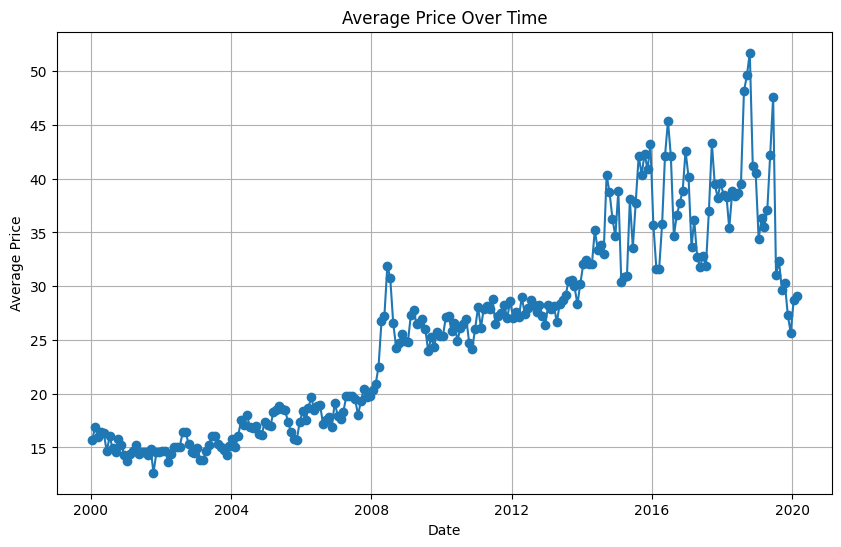

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime format if it's not already
df_wholesale['date'] = pd.to_datetime(df_wholesale['date'])

# Calculate the average price per date
df_avg_price = df_wholesale.groupby('date')['price'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_avg_price['date'], df_avg_price['price'], marker='o', linestyle='-')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [23]:
print("\nRetail Prices:")
df_retail


Retail Prices:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,...,price,usdprice,month,month_sin,month_cos,distance_from_central,climate_season,pandemic_phase,major_holiday_flag,year
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,...,15.00,0.3717,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1,2000
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,...,18.00,0.4461,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1,2000
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,...,105.37,2.6114,1,0.500000,0.866025,0.560898,Cool Dry Season,Pre-pandemic,1,2000
5,2000-01-15,Region III,Nueva Ecija,Palayan,15.541500,121.084800,cereals and tubers,"Rice (milled, superior)",KG,actual,...,19.00,0.4709,1,0.500000,0.866025,105.301063,Cool Dry Season,Pre-pandemic,1,2000
6,2000-01-15,Region III,Nueva Ecija,Palayan,15.541500,121.084800,cereals and tubers,"Rice (regular, milled)",KG,actual,...,18.10,0.4486,1,0.500000,0.866025,105.301063,Cool Dry Season,Pre-pandemic,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123089,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,...,71.67,1.4949,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0,2021
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,...,103.33,2.1555,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0,2021
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,...,114.17,2.3814,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0,2021
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,...,45.00,0.9387,2,0.866025,0.500000,799.170559,Cool Dry Season,Pandemic,0,2021


In [24]:
common_commodities = set(df_retail['commodity']).intersection(set(df_wholesale['commodity']))
print("Common commodities between df_retail and df_wholesale:")
print(common_commodities)

Common commodities between df_retail and df_wholesale:
{'Rice (regular, milled)', 'Rice (milled, superior)', 'Maize flour (yellow)', 'Maize flour (white)', 'Eggs', 'Maize (yellow)', 'Carrots', 'Maize (white)', 'Fish (fresh)', 'Cabbage', 'Sweet potatoes', 'Tomatoes'}


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Convert the date column to datetime format if it's not already
df_wholesale['date'] = pd.to_datetime(df_wholesale['date'])
df_retail['date'] = pd.to_datetime(df_retail['date'])

# Find common commodities
common_commodities = set(df_retail['commodity']).intersection(set(df_wholesale['commodity']))
print("Common commodities between df_retail and df_wholesale:")
print(common_commodities)

# Create a dropdown widget for selecting a commodity
commodity_dropdown = widgets.Dropdown(
    options=sorted(common_commodities),
    description='Commodity:',
    disabled=False,
)

# Function to update the plot based on the selected commodity
def update_plot(commodity):
    df_wholesale_commodity = df_wholesale[df_wholesale['commodity'] == commodity]
    df_retail_commodity = df_retail[df_retail['commodity'] == commodity]
    
    # Calculate the average price per date for wholesale and retail
    df_wholesale_avg = df_wholesale_commodity.groupby('date')['price'].mean().reset_index()
    df_retail_avg = df_retail_commodity.groupby('date')['price'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_wholesale_avg['date'], df_wholesale_avg['price'], marker='o', linestyle='-', label='Wholesale')
    plt.plot(df_retail_avg['date'], df_retail_avg['price'], marker='o', linestyle='-', label='Retail')
    plt.title(f'Price Over Time for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the dropdown and set up the interaction
widgets.interact(update_plot, commodity=commodity_dropdown)

Common commodities between df_retail and df_wholesale:
{'Rice (regular, milled)', 'Rice (milled, superior)', 'Maize flour (yellow)', 'Maize flour (white)', 'Eggs', 'Maize (yellow)', 'Carrots', 'Maize (white)', 'Fish (fresh)', 'Cabbage', 'Sweet potatoes', 'Tomatoes'}


interactive(children=(Dropdown(description='Commodity:', options=('Cabbage', 'Carrots', 'Eggs', 'Fish (fresh)'…

<function __main__.update_plot(commodity)>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Convert the date column to datetime format if it's not already
df_wholesale['date'] = pd.to_datetime(df_wholesale['date'])
df_retail['date'] = pd.to_datetime(df_retail['date'])

# Find common commodities
common_commodities = set(df_retail['commodity']).intersection(set(df_wholesale['commodity']))
print("Common commodities between df_retail and df_wholesale:")
print(common_commodities)

# Create a dropdown widget for selecting a commodity
commodity_dropdown = widgets.Dropdown(
    options=sorted(common_commodities),
    description='Commodity:',
    disabled=False,
)

# Function to update the plot based on the selected commodity
def update_plot(commodity):
    # Filter data for selected commodity
    df_wholesale_commodity = df_wholesale[df_wholesale['commodity'] == commodity]
    df_retail_commodity = df_retail[df_retail['commodity'] == commodity]

    # Merge dataframes on date first to ensure only common dates are included
    df_merged = pd.merge(df_wholesale_commodity, df_retail_commodity, on='date', suffixes=('_wholesale', '_retail'))

    # Compute the average price for only matching dates
    df_grouped = df_merged.groupby('date').agg({
        'price_wholesale': 'mean',
        'price_retail': 'mean'
    }).reset_index()

    # Calculate the percentage increase
    df_grouped['percent_increase'] = ((df_grouped['price_retail'] - df_grouped['price_wholesale']) / df_grouped['price_wholesale']) * 100
    
    # Compute the average % increase across all common dates
    avg_percent_increase = df_grouped['percent_increase'].mean()

    # Plot prices over time
    plt.figure(figsize=(12, 8))
    plt.plot(df_grouped['date'], df_grouped['price_wholesale'], marker='o', linestyle='-', label='Wholesale')
    plt.plot(df_grouped['date'], df_grouped['price_retail'], marker='o', linestyle='-', label='Retail')
    plt.title(f'Price Over Time for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)

    # Display the average percentage increase beside the graph
    plt.text(1.02, 0.5, f'Avg. % Increase:\n{avg_percent_increase:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')

    plt.show()

# Display the dropdown and set up the interaction
widgets.interact(update_plot, commodity=commodity_dropdown)


Common commodities between df_retail and df_wholesale:
{'Rice (regular, milled)', 'Rice (milled, superior)', 'Maize flour (yellow)', 'Maize flour (white)', 'Eggs', 'Maize (yellow)', 'Carrots', 'Maize (white)', 'Fish (fresh)', 'Cabbage', 'Sweet potatoes', 'Tomatoes'}


interactive(children=(Dropdown(description='Commodity:', options=('Cabbage', 'Carrots', 'Eggs', 'Fish (fresh)'…

<function __main__.update_plot(commodity)>

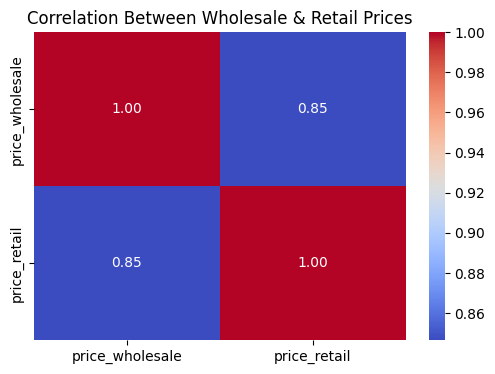

In [27]:
import numpy as np

# Merge datasets on date & commodity
df_merged = pd.merge(df_wholesale, df_retail, on=['date', 'commodity'], suffixes=('_wholesale', '_retail'))

# Compute correlation matrix
corr_matrix = df_merged[['price_wholesale', 'price_retail']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Wholesale & Retail Prices')
plt.show()


In [28]:
# # Compute % increase per day
# df_merged['percent_increase'] = ((df_merged['price_retail'] - df_merged['price_wholesale']) / df_merged['price_wholesale']) * 100

# plt.figure(figsize=(12, 6))
# plt.bar(df_merged['date'], df_merged['percent_increase'], color='purple', alpha=0.7)
# plt.xlabel('Date')
# plt.ylabel('Percentage Increase (%)')
# plt.title('Daily Percentage Increase from Wholesale to Retail')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()


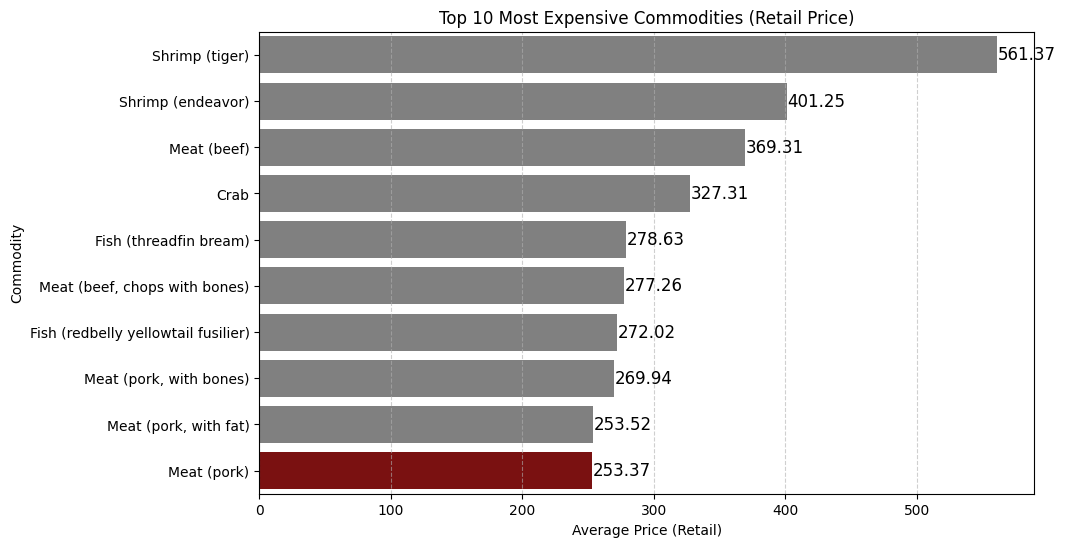

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average prices and select top 10 most expensive commodities
avg_prices = df_retail.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)

# Define color scheme (highlight the most expensive commodity)
colors = ['gray'] * (len(avg_prices) - 1) + ['darkred']  # Dark red for highest price

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices, y=avg_prices.index, palette=colors)

# Add price labels to each bar
for index, value in enumerate(avg_prices):
    plt.text(value + 0.5, index, f"{value:.2f}", va='center', fontsize=12)

plt.xlabel('Average Price (Retail)')
plt.ylabel('Commodity')
plt.title('Top 10 Most Expensive Commodities (Retail Price)')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Light grid for readability

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Compute the average price per commodity within each category
df_avg_price = df_retail.groupby(['category', 'commodity'])['price'].mean().reset_index()

# Function to get the top 10 most expensive commodities per category
def get_top_10_expensive(df):
    return df.sort_values(by=['category', 'price'], ascending=[True, False]).groupby('category').head(10)

df_top_10 = get_top_10_expensive(df_avg_price)

# Create a dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=sorted(df_top_10["category"].unique()),
    description="Category:",
    disabled=False
)

# Function to update the plot based on selected category
def update_plot(category):
    df_filtered = df_top_10[df_top_10["category"] == category].sort_values(by="price", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # Use a better color scheme (coolwarm)
    colors = sns.color_palette("coolwarm", len(df_filtered))

    ax = sns.barplot(
        x=df_filtered["price"], 
        y=df_filtered["commodity"], 
        palette=colors
    )

    # Add price labels inside bars
    for index, value in enumerate(df_filtered["price"]):
        ax.text(value - 0.2, index, f"{value:.2f}", va='center', ha='right', fontsize=11, color="white", fontweight="bold")

    # Formatting
    plt.xlabel("Average Price (Retail)", fontsize=14, fontweight='bold')
    plt.ylabel("Commodity", fontsize=14, fontweight='bold')
    plt.title(f"🔝 Top 10 Most Expensive Commodities in {category}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.show()

# Display the dropdown and interactive plot
widgets.interact(update_plot, category=category_dropdown)


interactive(children=(Dropdown(description='Category:', options=('cereals and tubers', 'meat, fish and eggs', …

<function __main__.update_plot(category)>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Ensure 'date' is in datetime format
df_retail["date"] = pd.to_datetime(df_retail["date"])
df_retail["year"] = df_retail["date"].dt.year

# List of commodities for dropdown selection
commodities_list = [
    "Rice (milled, superior)", "Rice (regular, milled)", "Meat (pork)",
    "Chicken", "Oil (cooking)", "Eggs", "Sugar (white)", "Tomatoes"
]

# Dropdown widget for selecting a commodity
commodity_dropdown = widgets.Dropdown(
    options=commodities_list,
    description="Commodity:",
    disabled=False
)

# Function to update the visualization dynamically
def update_plot(commodity):
    # Clear previous outputs
    plt.clf()

    # Filter data for selected commodity
    df_filtered = df_retail[df_retail["commodity"] == commodity]

    # Compute yearly average price
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()

    # Compute inflation rate (% change from previous year)
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100  # Convert to percentage

    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Line plot for price trend (yearly average price)
    sns.lineplot(data=df_yearly, x="year", y="price", marker="o", color="blue", ax=ax1, label="Avg. Price")
    ax1.set_ylabel("Average Price", fontsize=12, fontweight="bold", color="blue")
    ax1.set_xlabel("Year", fontsize=12, fontweight="bold")
    ax1.set_title(f"📈 Price Trend & Inflation Rate for {commodity}", fontsize=14, fontweight="bold")

    # Second y-axis for inflation rate
    ax2 = ax1.twinx()
    sns.barplot(data=df_yearly, x="year", y="inflation_rate", color="red", alpha=0.6, ax=ax2)
    ax2.set_ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold", color="red")

    # Show inflation values above bars
    for index, row in df_yearly.iterrows():
        if pd.notna(row["inflation_rate"]):  # Skip NaN values
            ax2.text(index, row["inflation_rate"], f"{row['inflation_rate']:.2f}%", 
                     color="red", fontsize=10, ha="center", va="bottom")

    # Grid and formatting
    ax1.grid(axis="y", linestyle="--", alpha=0.6)
    ax1.set_xticks(df_yearly["year"])
    ax1.tick_params(axis="x", rotation=45)

    plt.show()

# Use interact to ensure the graph updates properly
widgets.interact(update_plot, commodity=commodity_dropdown)


interactive(children=(Dropdown(description='Commodity:', options=('Rice (milled, superior)', 'Rice (regular, m…

<function __main__.update_plot(commodity)>

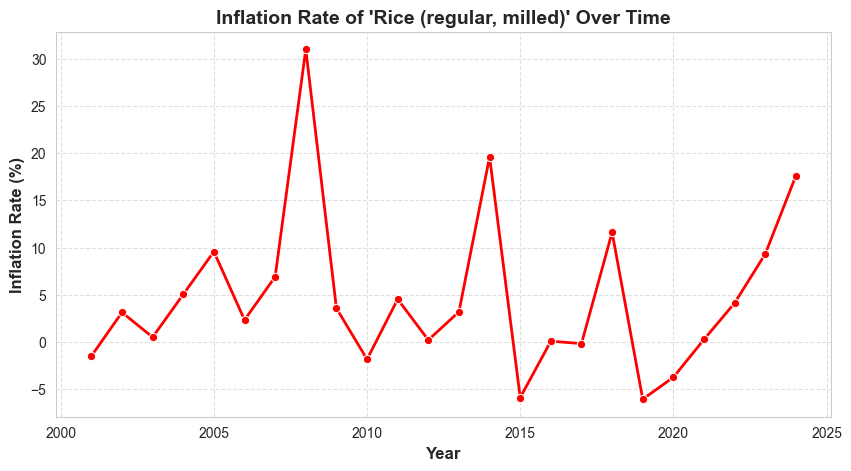

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format
df_retail["date"] = pd.to_datetime(df_retail["date"])

# Filter for 'Rice (regular, milled)' and exclude 2025
df_rice = df_retail[(df_retail["commodity"] == "Rice (regular, milled)") & (df_retail["date"].dt.year < 2025)].copy()

# Extract year
df_rice["year"] = df_rice["date"].dt.year

# Compute yearly average price
df_yearly = df_rice.groupby("year", as_index=False)["price"].mean()

# Calculate inflation rate (percentage change from previous year)
df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

# Plot inflation rate over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="red")

# Add labels and title
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
plt.title("Inflation Rate of 'Rice (regular, milled)' Over Time", fontsize=14, fontweight="bold")

# Show grid for readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Ensure 'date' column is in datetime format
df_retail["date"] = pd.to_datetime(df_retail["date"])

# Define the list of commodities for the dropdown
commodities = [
    "Rice (milled, superior)", "Rice (regular, milled)", "Meat (pork)", "Eggs", "Tomatoes"
]

# Create a dropdown widget
commodity_dropdown = widgets.Dropdown(
    options=commodities,
    description="Commodity:",
    disabled=False
)

# Function to update the plot
def update_plot(commodity):
    # Filter data based on selected commodity and exclude 2025
    df_filtered = df_retail[(df_retail["commodity"] == commodity) & (df_retail["date"].dt.year < 2025)].copy()

    # Extract year and compute yearly average price
    df_filtered["year"] = df_filtered["date"].dt.year
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()

    # Compute inflation rate (percentage change from previous year)
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

    # Plot inflation rate over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="red")

    # Add labels and title
    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
    plt.title(f"Inflation Rate of '{commodity}' Over Time", fontsize=14, fontweight="bold")

    # Show grid for readability
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Display the dropdown and interactive plot
widgets.interact(update_plot, commodity=commodity_dropdown)


interactive(children=(Dropdown(description='Commodity:', options=('Rice (milled, superior)', 'Rice (regular, m…

<function __main__.update_plot(commodity)>